# Importando pacotes importantes

In [1]:
import torch
import matplotlib.pyplot as plt
from util import fileutils
from nn.knn import KNN

# Lendo base para realizar a memorização

In [2]:
samples, target = fileutils.reader(path='data/dados-ex1-1.csv') # Coletando dados para memorização

# Plotando base de treinamento para melhor visualização

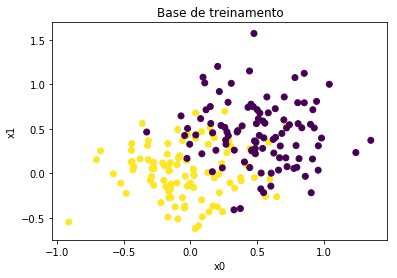

In [3]:
plt.scatter(samples[:, 0], samples[:, 1], c=target)
plt.title('Base de treinamento')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# Gerando a região de decisão

In [4]:
Zx, Zy = torch.meshgrid([torch.arange(-1, 1.7, 0.025), torch.arange(-1, 1.7, 0.025)])

# Organizando dimensões para agrupar os pontos (zx0, zy0), ..., (zxn, zyn)
Zx = Zx.reshape(Zx.shape[0] * Zx.shape[1]) 
Zy = Zy.reshape(Zy.shape[0] * Zy.shape[1])

Zz = []
for e in zip(Zx, Zy):
    Zz.append(torch.tensor([e[0], e[1]]).tolist())
Zz = torch.tensor(Zz)

# Realizando testes para K = 1, 3, 9, 27 e plotando resultados

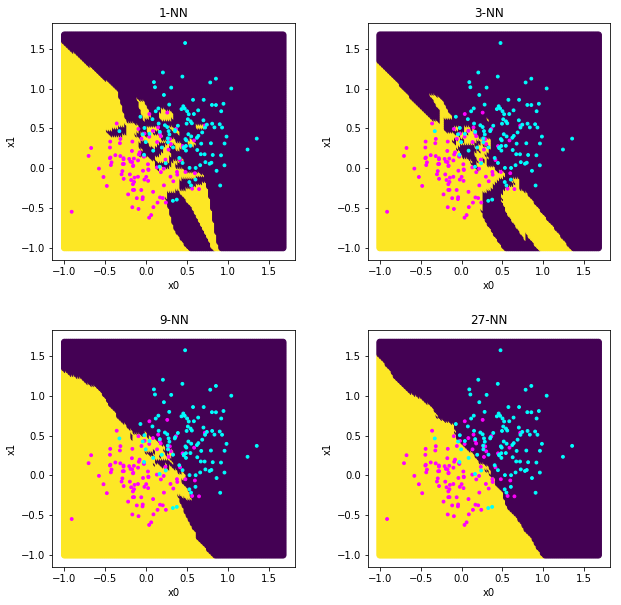

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.30, wspace=0.30)

for k, v in zip([1, 3, 9, 27], [[0, 0], [0, 1], [1, 0], [1, 1]]) :
        clf = KNN(k, samples, target)

        Z_targets = clf.predict(Zz)

        axs[v[0], v[1]].set_title('%s-NN' % k)
        axs[v[0], v[1]].set_xlabel('x0')
        axs[v[0], v[1]].set_ylabel('x1')
        axs[v[0], v[1]].scatter(Zx, Zy, c=Z_targets)
        axs[v[0], v[1]].scatter(samples[:, 0], samples[:, 1], s=8, c=target, cmap='cool')

plt.savefig('ex1-1-plot.png')
plt.show()

# Conclusão
Quanto maior o K para este problema, menos preciso será a predição da classe na qual aquela amostra pertence. Podemos ver pelo gráfico, que para K=27 a superfície de decisão se torna quase uma reta. Desta forma, diversos padrões rosas (classe 0) podem ser classificados de forma errada, isto ocorre porque alguns padrões rosas estão muito próximos de padrões azuis, logo quanto maior o número de vizinhos próximos, maior a chance daquela amostra ser classificada de forma errada. Portanto, para este problema K=1 traz uma solução com melhor precisão, graficamente falando.

# Autores
- **Christiano Machado** @ https://github.com/chrismachado
- **Vitor Veras** @ https://github.com/vitorverasm
